In [2]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

In [189]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

**Задание 1**

In [3]:
regRidge = linear_model.Ridge()
regRidge.fit(X_train, y_train)
regLasso = linear_model.Lasso()
regLasso.fit(X_train, y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

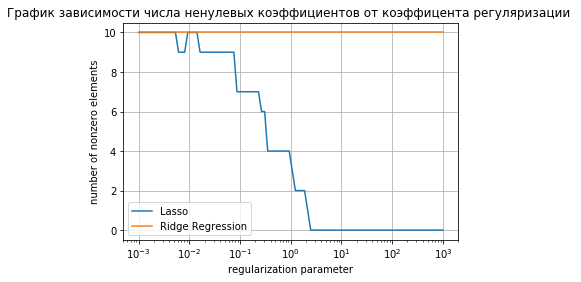

In [4]:
num = 100
par = np.logspace(np.log10(0.001), np.log10(1000), num)
l = np.empty(num)
r = np.empty(num)
for p in range(num):
    regR = linear_model.Ridge(alpha=par[p])
    regR.fit(X_train, y_train)
    regL = linear_model.Lasso(alpha=par[p])
    regL.fit(X_train, y_train)
    r[p] = np.count_nonzero(regR.coef_)
    l[p] = np.count_nonzero(regL.coef_)

ax = plt.axes()
plt.title(
    "График зависимости числа ненулевых коэффициентов от коэффицента регуляризации ")
plt.semilogx(par, l, label=u"Lasso")
plt.semilogx(par, r, label=u"Ridge Regression")
ax.set_xlabel(u"regularization parameter")
ax.set_ylabel(u"number of nonzero elements")
ax.grid()
ax.legend()


In [381]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error

y_pred = regRidge.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


RMSE: 58.3044151277
MAE: 49.6028460728
R2: 0.359899386837


/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


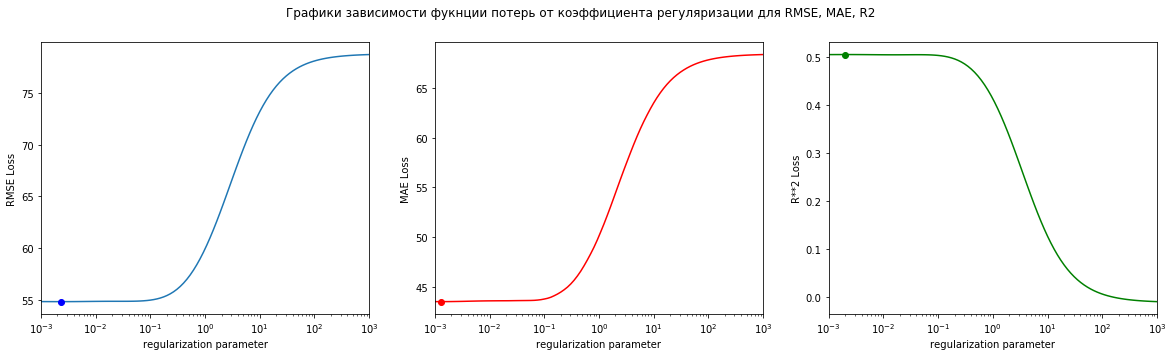

In [382]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error


def RMSE(y_true, y_pred):
    mse = (mean_squared_error(y_true, y_pred))**0.5
#     print ('RMSE: %2.3f' % mse)
    return mse


def MAE(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
#     print ('MAE: %2.3f' % mae)
    return mae


tuned_parameters = [{'alpha': par}]
n_folds = KFold(n_splits=5)

clf = GridSearchCV(regRidge, tuned_parameters, cv=n_folds,
                   scoring=make_scorer(RMSE, greater_is_better=False))
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
rmse_alpha = clf.best_params_['alpha']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle(
    "Графики зависимости фукнции потерь от коэффициента регуляризации для RMSE, MAE, R2")
ax1.semilogx(par, abs(scores))
ax1.set_ylabel('RMSE Loss')
ax1.set_xlabel('regularization parameter')
ax1.plot(rmse_alpha, abs(clf.best_score_), 'bo')
ax1.set_xlim([par[0], par[-1]])


clf = GridSearchCV(regRidge, tuned_parameters, cv=n_folds,
                   scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
mae_alpha = clf.best_params_['alpha']
ax2.semilogx(par, abs(scores), 'r')
ax2.set_ylabel('MAE Loss')
ax2.set_xlabel('regularization parameter')
ax2.plot(mae_alpha, abs(clf.best_score_), 'ro')
ax2.set_xlim([par[0], par[-1]])

# best_params = clf.best_params_
# score = clf.best_score_
# for item in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['params']):
#     print ('Mean:' , item)
# print ('%s\tHP\t%s\t%f' % ("R" , str(best_params) ,abs(score)))

clf = GridSearchCV(regRidge, tuned_parameters, cv=n_folds, scoring='r2')
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
r2_alpha = clf.best_params_['alpha']
ax3.semilogx(par, scores, 'g')
ax3.set_ylabel('R**2 Loss')
ax3.set_xlabel('regularization parameter')
ax3.plot(r2_alpha, clf.best_score_, 'go')
ax3.set_xlim([par[0], par[-1]])
fig.show()


In [383]:
regRidge.set_params(alpha=rmse_alpha)
regRidge.fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**0.5

regRidge.set_params(alpha=mae_alpha)
regRidge.fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

regRidge.set_params(alpha=r2_alpha)
regRidge.fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


RMSE: 55.813173086
MAE: 47.1443797166
R2: 0.413263992259


**Задание 2**

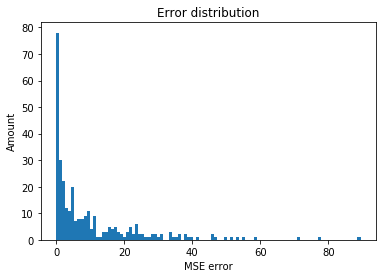

BEFORE--> MSE: 3104.35401828
AFTER--> MSE: 3102.80668944


In [41]:
from sklearn.model_selection import cross_val_predict

regRidge = linear_model.Ridge(alpha=0.02)

pred = cross_val_predict(regRidge, X_train, y_train, cv=5)
mse_er = np.absolute((y_train - pred)**2) / len(y_train)
outlier_mask = (mse_er < 74.43)
plt.hist(mse_er, bins=100)
plt.xlabel('MSE error')
plt.ylabel('Amount')
plt.title('Error distribution')
plt.show()
# BEFORE DELETES
regRidge.fit(X_train, y_train)
y_pred = regRidge.predict(X_test)
print("BEFORE--> MSE:", mean_squared_error(y_test, y_pred))

# idxs = np.where(mse_er > 25000.)
y_ntrain = y_train[outlier_mask]
X_ntrain = X_train[outlier_mask]
# AFTER DELETES
# regRidge = linear_model.Ridge()
regRidge.fit(X_ntrain, y_ntrain)
y_pred = regRidge.predict(X_test)
# print(X_test.shape, y_pred.shape)

print("AFTER--> MSE:", mean_squared_error(y_test, y_pred))


##  Часть 2. Логистическая регрессия

**Задание 1**

In [66]:
from scipy.special import expit
import numpy as np
from sklearn.base import BaseEstimator
from time import time


class LogReg(BaseEstimator):
    def __init__(self, lambda_1=0.0, lambda_2=1.0, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-2):
        """
        lambda_1: L1 regularization param
        lambda_2: L2 regularization param
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        alpha: learning rate
        """
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.loss_history = None
        self.spent_time = None

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        self.spent_time = []
        if self.w0 is None:
            self.w = np.random.rand(X.shape[1]) - 0.5
        else:
            self.w = self.w0
        iternum = 1
        gr_X = X
        gr_y = y
        while iternum <= self.max_iter:
            if self.gd_type == 'stochastic':
                idx = np.random.randint(X.shape[0] - 1)
                gr_X = X[idx:idx + 1]
                gr_y = y[idx:idx + 1]
            start = time()
            step = - self.alpha * self.calc_gradient(gr_X, gr_y)
            self.w += step
            self.loss_history = np.append(
                self.loss_history, self.calc_loss(X, y))
            end = time()
            self.spent_time = np.append(self.spent_time, end - start)
            if (np.sum(step**2)**0.5) < self.tolerance:
                #                 print("Ended with alpha")
                break
            iternum += 1
        return self

    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        probs = np.empty((X.shape[0], 2))
        probs[:, 1] = expit(np.dot(X, self.w))
        probs[:, 0] = 1 - probs[:, 1]
        return probs

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        yy = y.reshape(y.shape[0], 1)
        w = self.w.reshape(self.w.shape[0], 1)
        grad = - yy * X
        temp = expit(-y * np.dot(X, self.w)).reshape(X.shape[0], 1)
        grad = grad * temp
        grad = np.mean(grad, axis=0)
        grad += self.lambda_2 * self.w
        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        yy = y.reshape(y.shape[0], 1)
        w = self.w.reshape(self.w.shape[0], 1)
        add = np.logaddexp(0, -y * np.dot(X, self.w))
        loss = np.sum(add, axis=0)
        loss /= X.shape[0]
        loss += self.lambda_2 * 0.5 * np.dot(self.w, self.w)
        return loss


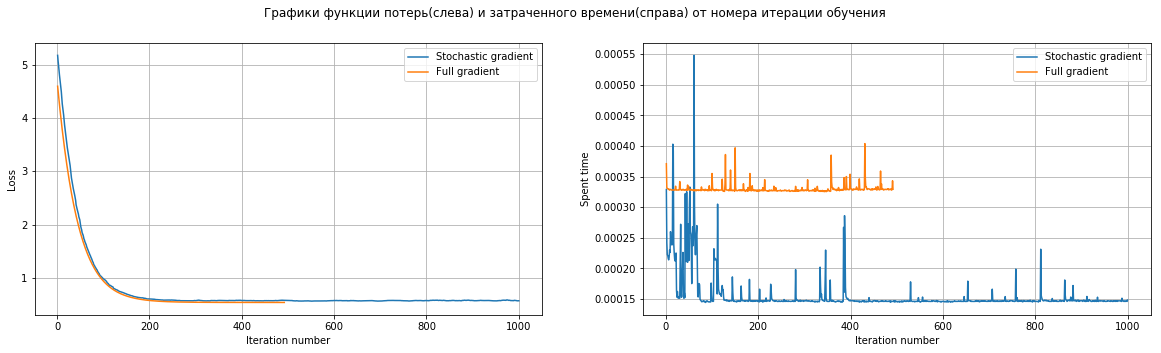

In [563]:
from sklearn.datasets import make_classification
from time import time

X, y = make_classification(n_samples=500, n_features=90)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=241)
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1
X_train = np.c_[np.ones(y_train.shape), X_train]
X_test = np.c_[np.ones(y_test.shape), X_test]
logreg = LogReg(gd_type='stochastic')
logreg.fit(X_train, y_train)
loss_st = logreg.loss_history.copy()
time_st = logreg.spent_time.copy()
logreg = LogReg(gd_type='full')
logreg.fit(X_train, y_train)
loss_f = logreg.loss_history.copy()
time_f = logreg.spent_time.copy()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(
    "Графики функции потерь(слева) и затраченного времени(справа) от номера итерации обучения")
x = np.arange(1, len(loss_st) + 1)
ax1.plot(x, loss_st, label="Stochastic gradient")
x = np.arange(1, len(loss_f) + 1)
ax1.plot(x, loss_f, label="Full gradient")
ax1.set_ylabel('Loss')
ax1.set_xlabel('Iteration number')
ax1.legend()
ax1.grid()
x = np.arange(1, len(time_st) + 1)
ax2.plot(x, time_st, label="Stochastic gradient")
x = np.arange(1, len(time_f) + 1)
ax2.plot(x, time_f, label="Full gradient")
ax2.set_ylabel('Spent time')
ax2.set_xlabel('Iteration number')
ax2.legend()
ax2.grid()


Stochastic gradient learning_rate: 0.098 0.581447963801
Full gradient learning_rate: 0.001 0.725


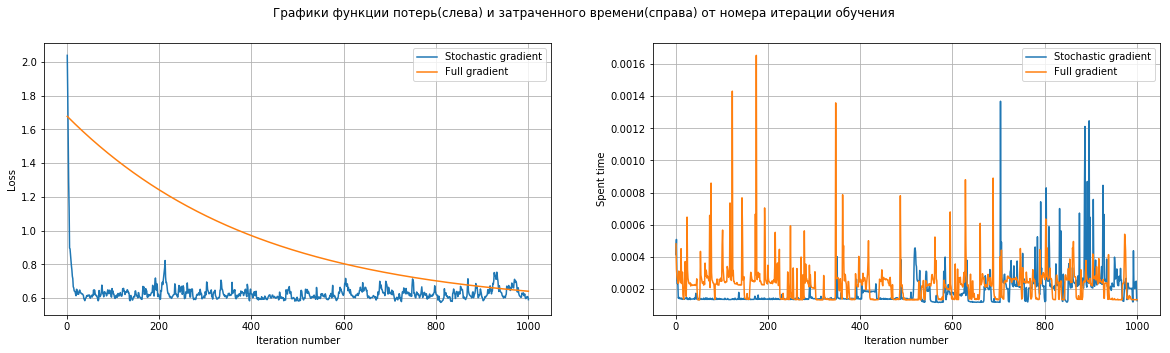

In [149]:
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score
from time import time

X, y = make_classification()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=241)
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1
X_train = np.c_[np.ones(y_train.shape), X_train]
X_test = np.c_[np.ones(y_test.shape), X_test]

alpha_lim = np.linspace(1e-3, 1e-1, 100)
losses_st = np.empty(100)
losses_f = np.empty(100)
it = 0
for alpha in alpha_lim:
    logreg = LogReg(
        lambda_2=1,
        tolerance=1e-6,
        max_iter=1000,
        alpha=alpha,
        gd_type='stochastic')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict_proba(X_test)
    y_pred = y_pred[:, 1]
    y_pred[y_pred < 0.5] = -1.
    y_pred[y_pred >= 0.5] = 1
    losses_st[it] = precision_score(
        y_test, y_pred.astype('int'), average='macro')
    logreg = LogReg(
        lambda_2=1,
        tolerance=1e-6,
        max_iter=1000,
        alpha=alpha,
        gd_type='full')
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict_proba(X_test)
    y_pred = y_pred[:, 1]
    y_pred[y_pred < 0.5] = -1.
    y_pred[y_pred >= 0.5] = 1
    losses_f[it] = precision_score(
        y_test, y_pred.astype('int'), average='macro')
    it += 1
alpha_st = alpha_lim[np.where(losses_st == np.min(losses_st))[0][0]]
alpha_f = alpha_lim[np.where(losses_f == np.min(losses_f))[0][0]]
print("Stochastic gradient learning_rate:", alpha_st, np.min(losses_st))
print("Full gradient learning_rate:", alpha_f, np.min(losses_f))

logreg = LogReg(
    lambda_2=1,
    tolerance=1e-6,
    max_iter=1000,
    alpha=alpha_st,
    gd_type='stochastic')
logreg.fit(X_train, y_train)
loss_st = logreg.loss_history.copy()
time_st = logreg.spent_time.copy()
logreg = LogReg(
    lambda_2=1,
    tolerance=1e-6,
    max_iter=1000,
    alpha=alpha_f,
    gd_type='full')
logreg.fit(X_train, y_train)
loss_f = logreg.loss_history.copy()
time_f = logreg.spent_time.copy()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(
    "Графики функции потерь(слева) и затраченного времени(справа) от номера итерации обучения")
x = np.arange(1, len(loss_st) + 1)
ax1.plot(x, loss_st, label="Stochastic gradient")
x = np.arange(1, len(loss_f) + 1)
ax1.plot(x, loss_f, label="Full gradient")
ax1.set_ylabel('Loss')
ax1.set_xlabel('Iteration number')
ax1.legend()
ax1.grid()
x = np.arange(1, len(time_st) + 1)
ax2.plot(x, time_st, label="Stochastic gradient")
x = np.arange(1, len(time_f) + 1)
ax2.plot(x, time_f, label="Full gradient")
ax2.set_ylabel('Spent time')
ax2.set_xlabel('Iteration number')
ax2.legend()
ax2.grid()


**Выводы:** обучение с полным градиентным спуском происходит дольше, однако при оптимальном learning_rate более стабильно и достигает наилучшего результата

**Задание 2**

In [22]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [133]:
logreg = LogReg(gd_type='full')
logreg.fit(X_train, y_train)
proba = logreg.predict_proba(X_test)

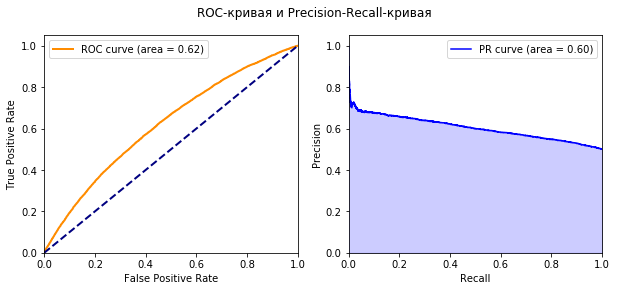

In [135]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import average_precision_score, roc_curve, roc_auc_score, auc

y_score = proba[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("ROC-кривая и Precision-Recall-кривая")
lw = 2
ax1.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

precision, recall, thresh = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)
ax2.step(recall, precision, color='b',
         where='post', label='PR curve (area = %0.2f)' % pr_auc)
ax2.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([0.0, 1.0])
ax2.legend()


In [137]:
idx = np.where(recall > 0.7)
thr = np.mean(thresh[idx[0]])
precs = np.mean(precision[recall > 0.7])
print("Для обеспечения полноты не менее 0.7 нужен порог {:.2f}, точность при этом равна {:.2f}".format(thr, precs))

y_score[y_score < thr] = 0
y_score[y_score >= thr] = 1
cnf_matrix = confusion_matrix(y_test, y_score)

Для обеспечения полноты не менее 0.7 нужен порог 0.47, точность при этом равна 0.53


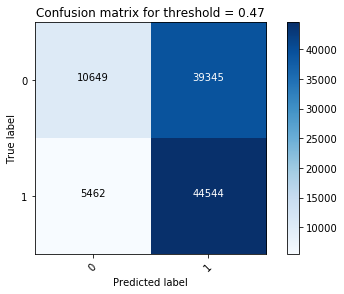

In [147]:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=np.unique(y_test),
    normalize=False,
    title='Confusion matrix for threshold = {:.2f}'.format(thr))

plt.show()


Вывод об алгоритме

**Задание 3**

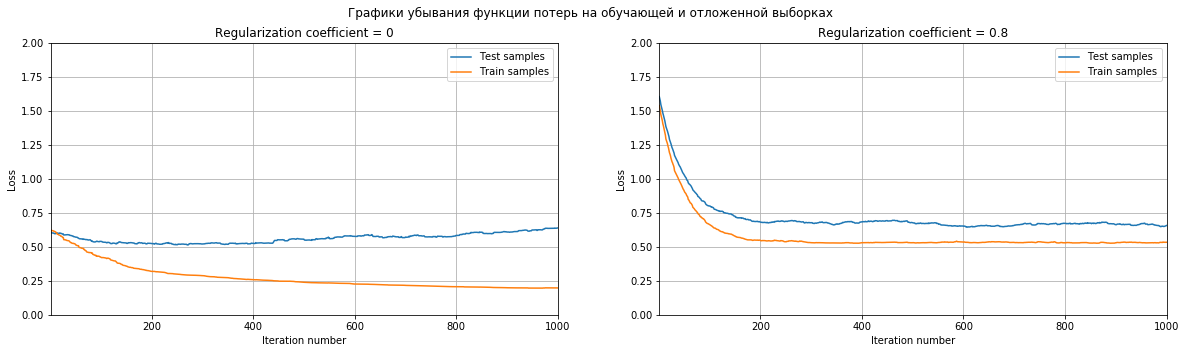

In [182]:
loss_test = np.array([])
loss_train = np.array([])
l2 = 0
logreg = LogReg(max_iter=1, lambda_2=l2)
logreg.fit(X_train, y_train)
l = logreg.calc_loss(X_test, y_test)
loss_test = np.append(loss_test, l)
l = logreg.calc_loss(X_train, y_train)
loss_train = np.append(loss_train, l)
w = logreg.w
for i in range(999):
    logreg = LogReg(max_iter=1, lambda_2=l2, w0=w)
    logreg.fit(X_train, y_train)
    l = logreg.calc_loss(X_test, y_test)
    loss_test = np.append(loss_test, l)
    l = logreg.calc_loss(X_train, y_train)
    loss_train = np.append(loss_train, l)
    w = logreg.w
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle(
    "Графики убывания функции потерь на обучающей и отложенной выборках")
x = np.arange(1, len(loss_test) + 1)
ax1.plot(x, loss_test, label="Test samples")
x = np.arange(1, len(loss_train) + 1)
ax1.plot(x, loss_train, label="Train samples")
ax1.set_title('Regularization coefficient = {}'.format(l2))
ax1.set_ylabel('Loss')
ax1.set_xlabel('Iteration number')
ax1.set_xlim([1, 1000])
ax1.set_ylim([0, 2.])
ax1.legend()
ax1.grid()

loss_test = np.array([])
loss_train = np.array([])
l2 = 0.8
logreg = LogReg(max_iter=1, lambda_2=l2)
logreg.fit(X_train, y_train)
l = logreg.calc_loss(X_test, y_test)
loss_test = np.append(loss_test, l)
l = logreg.calc_loss(X_train, y_train)
loss_train = np.append(loss_train, l)
w = logreg.w
for i in range(999):
    logreg = LogReg(max_iter=1, lambda_2=l2, w0=w)
    logreg.fit(X_train, y_train)
    l = logreg.calc_loss(X_test, y_test)
    loss_test = np.append(loss_test, l)
    l = logreg.calc_loss(X_train, y_train)
    loss_train = np.append(loss_train, l)
    w = logreg.w
x = np.arange(1, len(loss_test) + 1)
ax2.plot(x, loss_test, label="Test samples")
x = np.arange(1, len(loss_train) + 1)
ax2.plot(x, loss_train, label="Train samples")
ax2.set_xlim([1, 1000])
ax2.set_ylim([0, 2.])
ax2.set_ylabel('Loss')
ax2.set_xlabel('Iteration number')
ax2.set_title('Regularization coefficient = {}'.format(l2))
ax2.legend()
ax2.grid()


**Выводы:** при добавлении регуляризации общее значение функции потерь увеличивается, однако функция потерь для отложенной выборки убывает незначительно хуже функции потерь для обучающей выборки; без регуляризации функция потерь для отложенной выборки может возрастать, что свидетельствует о переобучении

## Часть 3. Метод опорных векторов и калибровка вероятностней


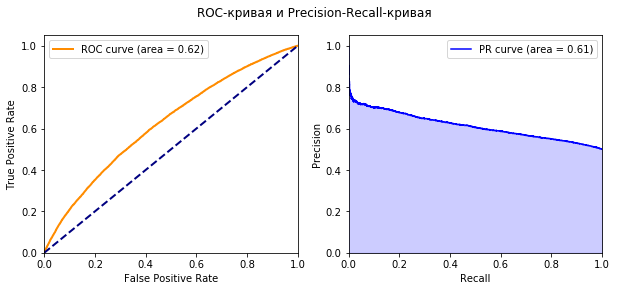

In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import average_precision_score, roc_curve, roc_auc_score, auc

svc = LinearSVC(C=1e-2)
svc.fit(X_train, y_train)
# y_score = svc.predict(X_test)
y_pred = svc.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("ROC-кривая и Precision-Recall-кривая")
lw = 2
ax1.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

precision, recall, thresh = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
ax2.step(recall, precision, color='b',
         where='post', label='PR curve (area = %0.2f)' % pr_auc)
ax2.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([0.0, 1.0])
ax2.legend()


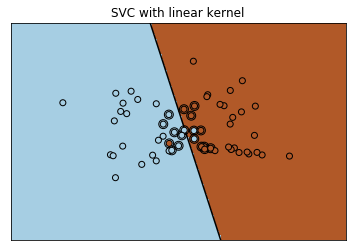

In [284]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
X, y = make_classification(n_samples=60, n_features=2,
                           n_informative=2, n_redundant=0)
clf = SVC(kernel='linear', C=0.5)
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# plot the line, the points, and the nearest vectors to the plane
plt.clf()
plt.plot(xx, yy, 'k-')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.title("SVC with linear kernel")
plt.show()


**Задание 2**

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых.
Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [87]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC


def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        halfseg = (r - l) / 2
        allinseg = y_test[(preds >= l) & (preds <= r)]
        if len(allinseg) != 0:
            bin_middle_points.append(l + halfseg)
            ratio = len(allinseg[allinseg == 1]) / len(allinseg)
            bin_real_ratios.append(ratio)
    plot(bin_middle_points, bin_real_ratios)


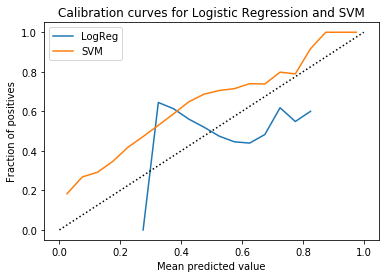

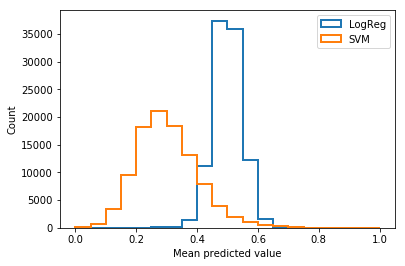

In [90]:
svc = LinearSVC(C=1e-2)
svc.fit(X_train, y_train)
y_pred = svc.decision_function(X_test)
y_predd = \
    (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())
logreg = LogReg()
logreg.fit(X_train, y_train)
log_probs = logreg.predict_proba(X_test)
plt.figure()
plt.title("Calibration curves for Logistic Regression and SVM")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plot_calibration_curve(y_test, log_probs[:, 0])
plot_calibration_curve(y_test, y_predd)
plot([0, 1], [0, 1], "k:")
plt.legend(["LogReg", "SVM"])

plt.figure()
plt.hist(log_probs[:, 1], range=(0, 1), bins=20, label="Logistic Regression",
         histtype="step", lw=2)
plt.hist(y_predd, range=(0, 1), bins=20, label="Logistic Regression",
         histtype="step", lw=2)
plt.xlabel("Mean predicted value")
plt.ylabel("Count")
plt.legend(["LogReg", "SVM"])


Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

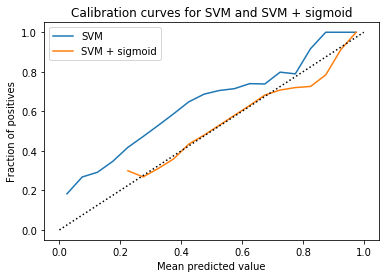

In [93]:
from sklearn.calibration import CalibratedClassifierCV
cal_clf = CalibratedClassifierCV(svc, cv=2, method='sigmoid')
cal_clf.fit(X_train, y_train)
cal_y = cal_clf.predict_proba(X_test)
plt.figure()
plt.title("Calibration curves for SVM and SVM + sigmoid")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plot_calibration_curve(y_test, y_predd)
plot_calibration_curve(y_test, cal_y[:, 1])
plot([0, 1], [0, 1], "k:")
plt.legend(["SVM", "SVM + sigmoid"])


## Часть 4. Работа с категориальными переменными

**Задание 1** 

In [133]:
from sklearn.linear_model import LogisticRegression
from time import time
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

encoded_data = pd.get_dummies(
    data, columns=[
        col for col in data if col.endswith('cat')])
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

encoded_data = pd.concat(
    (encoded_data.iloc[mask_plus],
     encoded_data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(
    encoded_data, target, test_size=0.5)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

logreg = LogisticRegression()
start = time()
logreg.fit(X_train, y_train)
end = time()
print('Time to fit the one-hot encoded model: {}'.format(end - start))
enc_probs = logreg.predict_proba(X_test)


Time to fit the one-hot encoded model: 10.324315071105957


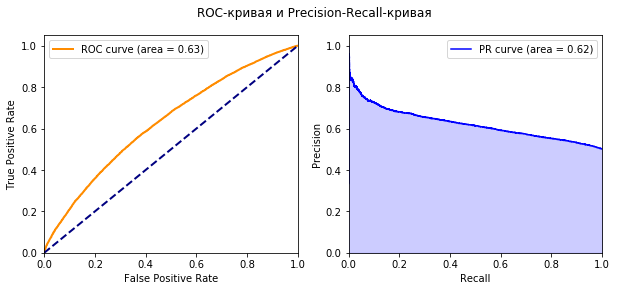

In [134]:
y_score = enc_probs[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("ROC-кривая и Precision-Recall-кривая")
lw = 2
ax1.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

precision, recall, thresh = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)
ax2.step(recall, precision, color='b',
         where='post', label='PR curve (area = %0.2f)' % pr_auc)
ax2.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([0.0, 1.0])
ax2.legend()


**Задание 2** 

In [166]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

cols = [col for col in data if col.endswith('cat')]

for j in cols:
    g = np.empty(data[j].shape)
    xx = np.unique(data[j])
    for x in xx:
        g[data[j] == x] = np.count_nonzero(
            (data[j] == x) * target) / np.count_nonzero(data[j] == x)
    data[j] = g


# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

logreg = LogisticRegression()
start = time()
logreg.fit(X_train, y_train)
end = time()
print('Time to fit the one-hot encoded model: {}'.format(end - start))
enc_probs = logreg.predict_proba(X_test)


Time to fit the one-hot encoded model: 1.9442839622497559


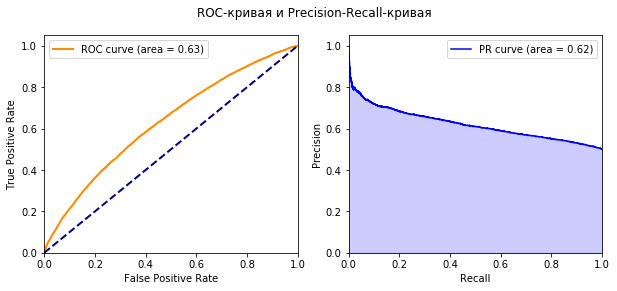

In [167]:
y_score = enc_probs[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("ROC-кривая и Precision-Recall-кривая")
lw = 2
ax1.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

precision, recall, thresh = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)
ax2.step(recall, precision, color='b',
         where='post', label='PR curve (area = %0.2f)' % pr_auc)
ax2.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([0.0, 1.0])
ax2.legend()


**Задание 6.** Поделитесь лучшим стикерпаком. Только там не должно быть преподавателей и ассистентов этого курса.

**Ответ:** https://t.me/addstickers/KotikKotikKotik

**открытые источники, использованные в работе: http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py**

**https://habrahabr.ru/company/ods/blog/336168/**

**http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py**

**http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py**

**https://habrahabr.ru/company/ods/blog/328372/**

**http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html**

**http://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py**

**Оценка: 9**